## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
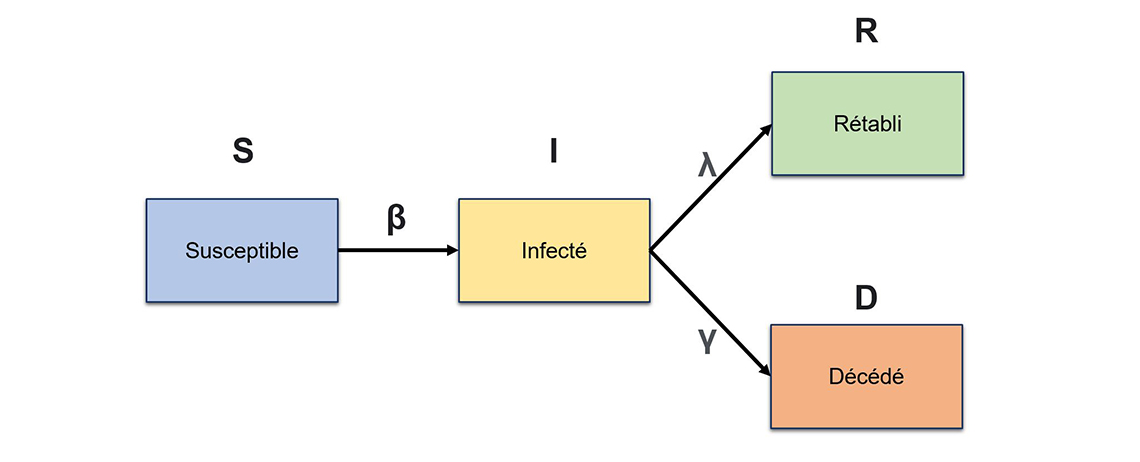


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [11]:
# 0. Discrétisation du système d'équations différentielles

"""
beta : taux de transmission de la maladie
gama : taux de guerison 
mu : taux de mortalité
Discretiser le système d'équations différentielles
S' = -beta.S.I
S(i+1)-S/step = -beta * S * I
S(i+1) = -beta*S*I*step + S = S* (1- beta*I*step)
S(i+1) = S * (1- beta*I*step) -- solution

I' = beta*S*I - gama*I - mu*I -- infecté
I(i+1) = (beta*S*I - gama*I - mu*I)step + I = I*step*(beta*S - gama - mu) + I
I(i+1) = I*(step*(beta*S - gama - mu) + 1) -- solution 2

R' = gama*I -- rétabli (gueri)
R(i+1) = gama*I*step + R -- solution 3

D' = mu*I -- Décès
D(i+1) = mu*I*step + D -- solution 4
------------------
"""

"\nbeta : taux de transmission de la maladie\ngama : taux de guerison \nmu : taux de mortalité\nDiscretiser le système d'équations différentielles\nS' = -beta.S.I\nS(i+1)-S/step = -beta * S * I\nS(i+1) = -beta*S*I*step + S = S* (1- beta*I*step)\nS(i+1) = S * (1- beta*I*step) -- solution\n\nI' = beta*S*I - gama*I - mu*I -- infecté\nI(i+1) = (beta*S*I - gama*I - mu*I)step + I = I*step*(beta*S - gama - mu) + I\nI(i+1) = I*(step*(beta*S - gama - mu) + 1) -- solution 2\n\nR' = gama*I -- rétabli (gueri)\nR(i+1) = gama*I*step + R -- solution 3\n\nD' = mu*I -- Décès\nD(i+1) = mu*I*step + D -- solution 4\n------------------\n"

In [13]:
# 1. Fonction qui implemente la methode d'Euler pour ces equations différentielles

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tqdm.contrib.itertools import product

def sird_euler(beta, gama, mu, susceptibles_O, infectes_0, retablis_0, deces_0, step, duree=1):

    #Les conditions initiales
    susceptibles, infectes = [susceptibles_O], [infectes_0]
    retablis, deces = [retablis_0], [deces_0]
    
    # durée en jours (par défaut, à 1 jour)
    #step : le pas de temps
        
    points = int(duree/step)
    times = [0] # le temps, initial O
     
    
    for _ in range(1, points):
        new_times = times[-1] + step
        new_susceptibles =  susceptibles[-1] * (1 - beta*infectes[-1]*step) #S(i+1) = S * (1- beta*I*step) -- solution
        new_infectes = infectes[-1]* ( step*(beta*susceptibles[-1] - gama - mu) + 1) # I(i+1) = I*(step*(beta*S - gama - mu) + 1)
        new_retablis = gama*infectes[-1]*step + retablis[-1] # R(i+1) = gama*I*step + R -- solution 3
        new_deces = mu*infectes[-1]*step + deces[-1] # D(i+1) = mu*I*step + D -- solution 4

        times.append(new_times)
        susceptibles.append(new_susceptibles)
        infectes.append(new_infectes)
        retablis.append(new_retablis)
        deces.append(new_deces)
    
    times = np.array(times[::100])
    susceptibles = np.array(susceptibles[::100])
    infectes = np.array(infectes[0::100])
    retablis = np.array(retablis[::100])
    deces = np.array(deces[::100])

    return times, susceptibles, infectes, retablis, deces


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [17]:
# 1. Simulation sur le jeu de paramètres donnée ci-dessus
beta, gama, mu = 0.5, 0.15, 0.015 # parametres initiaux
S0, I0, R0, D0 = 0.99, 0.01, 0, 0 # etats initiaux
step = 0.01 # pas
duree = 90 # temps (90 jours)
times, susceptibles, infectes, retablis, deces = sird_euler(beta, gama, mu, S0, I0, R0, D0, step, duree)

# Un petit affichage de données brutes résultantes
print(f"Temps(en j) : {times}\n")
print(f"Susceptibles  :{susceptibles}\n")
print(f"Infectés  :{infectes}\n")
print(f"Rétablis  :{retablis}\n")
print(f"Décès  :{deces}\n")


Temps(en j) : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]

Susceptibles  :[0.99       0.98416664 0.97613846 0.96516397 0.95029911 0.93041287
 0.90424407 0.87054141 0.82831104 0.77716082 0.71766005 0.651556
 0.58167503 0.51145088 0.44422908 0.38263555 0.32824559 0.28159991
 0.24244993 0.21007091 0.18353105 0.16187424 0.14422158 0.12981437
 0.11802213 0.10833289 0.10033642 0.09370635 0.08818361 0.08356254
 0.0796794  0.07640336 0.07362939 0.07127268 0.06926442 0.06754843
 0.06607861 0.06481691 0.06373178 0.06279691 0.06199028 0.06129337
 0.06069055 0.06016857 0.0597162  0.05932382 0.05898325 0.05868747
 0.05843045 0.058207   0.05801266 0.05784358 0.05769642 0.05756832
 0.

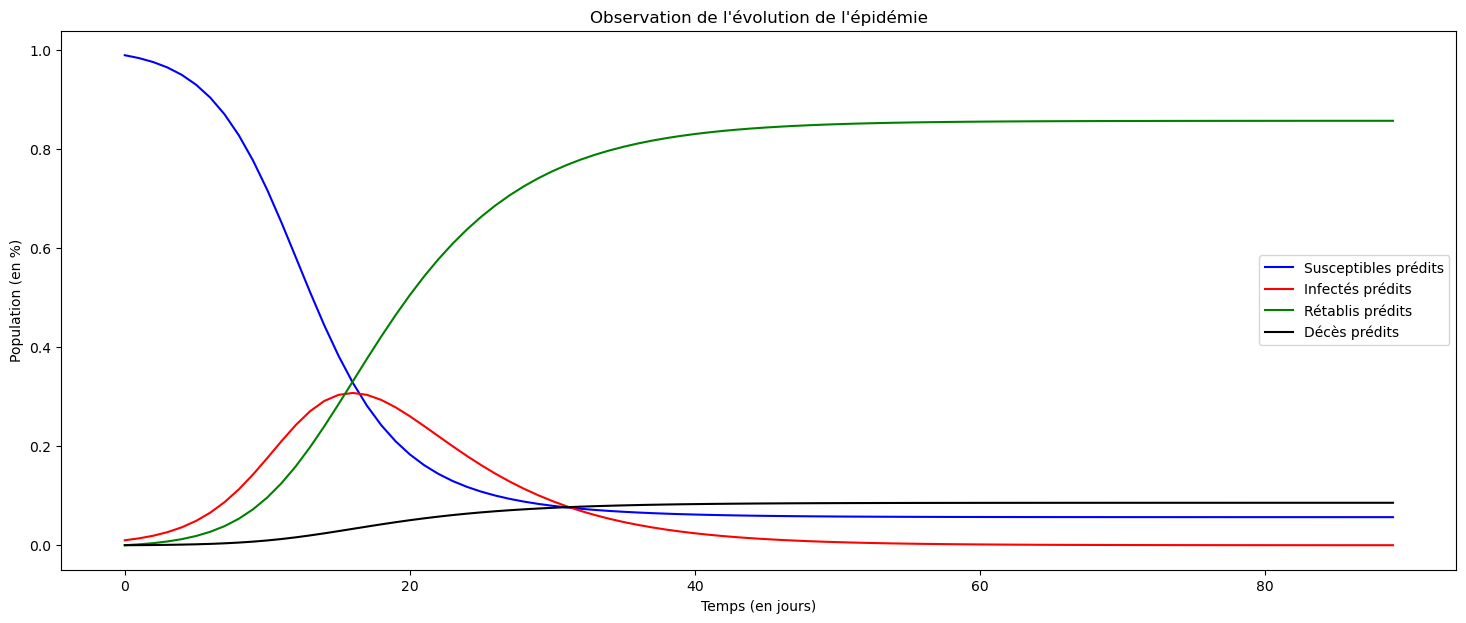

In [19]:
# 2. Graphique, courbes des SIRD en fonction du temps 
def plot_sird_euler(times, susceptibles, infectes, retablis, deces):
    
    plt.figure(figsize=(18, 7))
    plt.plot(times, susceptibles, 'blue', label='Susceptibles prédits')
    plt.plot(times, infectes, 'red', label = 'Infectés prédits')
    plt.plot(times, retablis, 'green', label = 'Rétablis prédits')
    plt.plot(times, deces, 'black', label = 'Décès prédits')
    
    plt.legend()
    plt.xlabel('Temps (en jours)')
    plt.ylabel('Population (en %)')
    plt.title('Observation de l\'évolution de l\'épidémie')
    
    plt.show()

# Affichage 
plot_sird_euler(times, susceptibles, infectes, retablis, deces)

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [22]:
#1. Lecture du dataset "sird_dataset.csv"
data_sird = pd.read_csv('./sird_dataset.csv')
data_sird.head(10)

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
5,5,0.961635,0.023929,0.007991,-0.004192
6,6,0.952589,0.033064,0.008276,-0.011207
7,7,0.947955,0.037206,0.018021,-0.009838
8,8,0.947917,0.037233,0.018867,-0.015331
9,9,0.929889,0.046950,0.009500,0.004338


In [24]:
#2. Fonction de coût qui mesure l'écart entre les données aobservées et celles prédites

def mse_sird(observation, prediction):
    mse = 0
    echantillons = len(observation)
    for i in range(0, echantillons):
        mse += (observation[i] - prediction[i])**2
    mse = mse/echantillons    
    return mse

## Ici, nous n'avons pas rééchantilloner (ou suréchantilloner) les données prédites et/ou valeurs réelles, 
## par ce que nous avons pris 90 jours (times) dans tous les deux cas

# Justification du choix

- Le MSE est adapté au problème de regression linéaire où nous ajustons des courbes continues (comme le modèle SIRD).

- Le CCE est utilisée pour la classification (par exemple infecté ou non infecté), ce qui ne convient pas, en effet.

  
Le MSE minimise l'écart quadratique entre les valeurs observées et celles prédites par le modèle, ce qui est idéal 
pour mesurer la précision de notre simulation.

In [35]:
#3. Minimisation des paramètres du modèle avec grid search
def grid_search_sird(observation, step, duree):

    S0, I0, R0, D0 = 0.99, 0.01, 0, 0 # etats initiaux
    
    # valeurs possibles pour les trois coefficients
    betas = np.linspace(0.25, 0.5, 15) 
    gamas = np.linspace(0.08, 0.15, 15)
    mus = np.linspace(0.005, 0.015, 15)

    super_beta, super_gama, super_mu = None, None, None
    super_mse = float('inf')
    
    for beta, gama, mu in product(betas, gamas, mus):
        times, susceptibles_predict, infectes_predict, retablis_predict, deces_predict= sird_euler(beta, gama, mu, S0, I0, R0, D0, step, duree)     
        
        mse_susceptible = mse_sird(observation['Susceptibles'], susceptibles_predict)
        mse_infectes = mse_sird(observation['Infectés'], infectes_predict)
        mse_retablis = mse_sird(observation['Rétablis'], retablis_predict)
        mse_deces = mse_sird(observation['Décès'], deces_predict)
        
        total_mse = mse_susceptible + mse_infectes + mse_retablis + mse_deces 
        if total_mse < super_mse:
            super_mse = total_mse
            super_beta, super_gama, super_mu = beta, gama, mu   
        
    print(f"Super beta : {super_beta:.3f}")
    print(f"Super gama : {super_gama:.3f}")
    print(f"Super mu : {super_mu:.3f}\n")
    
    return super_beta, super_gama, super_mu


In [37]:
step = 0.01 # pas
duree = 90 # temps (90 jours)
super_beta, super_gama, super_mu = grid_search_sird(data_sird, step, duree)

  0%|          | 0/3375 [00:00<?, ?it/s]

Super beta : 0.286
Super gama : 0.095
Super mu : 0.009



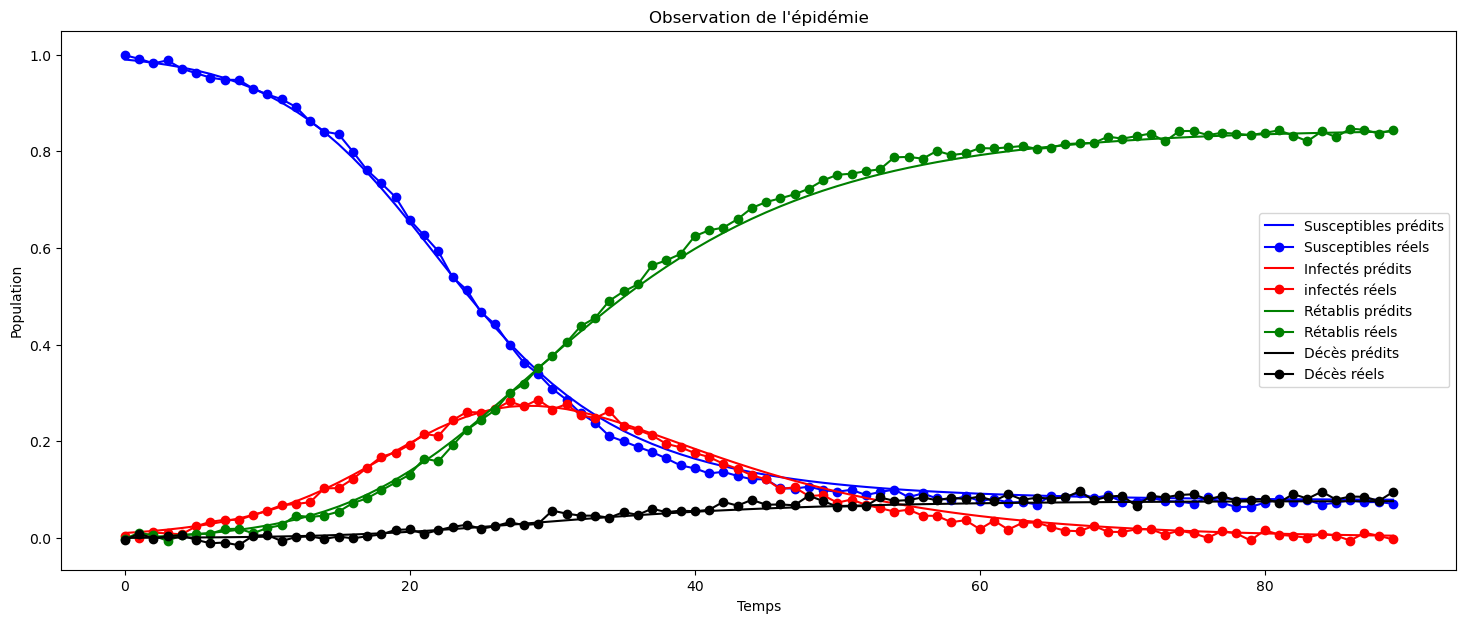

In [39]:
#4 Visualisation sur un même graphique les résultats du medèle et les données empiriques

times, susceptibles_predict, infectes_predict, retablis_predict, deces_predict = sird_euler(super_beta, super_gama, super_mu, S0, I0, R0, D0, step, duree)     

plt.figure(figsize=(18, 7))
plt.plot(times, susceptibles_predict, 'blue', label='Susceptibles prédits')
plt.plot(times, data_sird['Susceptibles'], 'bo-', label = 'Susceptibles réels')

plt.plot(times, infectes_predict, 'red', label = 'Infectés prédits')
plt.plot(times, data_sird['Infectés'], 'ro-', label = 'infectés réels')    

plt.plot(times, retablis_predict, 'green', label = 'Rétablis prédits')
plt.plot(times, data_sird['Rétablis'], 'go-', label = 'Rétablis réels')

plt.plot(times, deces_predict, 'black', label = 'Décès prédits')
plt.plot(times, data_sird['Décès'], 'ko-', label = 'Décès réels')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Observation de l\'épidémie')
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

# 1. Interprétation du R0:
1. Si R0 > 0, une personne infectée contamine en moyenne plus d'une personne, cela veut dire que l'épidémie se propage et gagne du terrain.
2. Si R0 < 0, cela veut dire qu'une personne infectée contamine en moyenne moins d'une personne, par conséquent, l'épidémie se ralentit et finit par disparaitre.

NB : pour rendre le modèle plus performant, on pourra notamment exploiter plus des paramètres de la nature, comme le climat, les conditions sociales, la saison..., un complement -:);

In [107]:
#2 Nouvelle valeur de beta, une réduction de 70%

R0_initial = super_beta/(super_gama+super_mu)

beta_intervention = super_beta*0.3

R0_intervention = beta_intervention/(super_gama+super_mu)

print(f"Réduction Beta de 70% : {beta_intervention:.3f}\n")

print(f"R0 Initial : {R0_initial:.3f}\n")
print(f"R0 après Intervention : {R0_intervention:.3f}\n")

Réduction Beta de 70% : 0.086

R0 Initial : 2.759

R0 après Intervention : 0.828



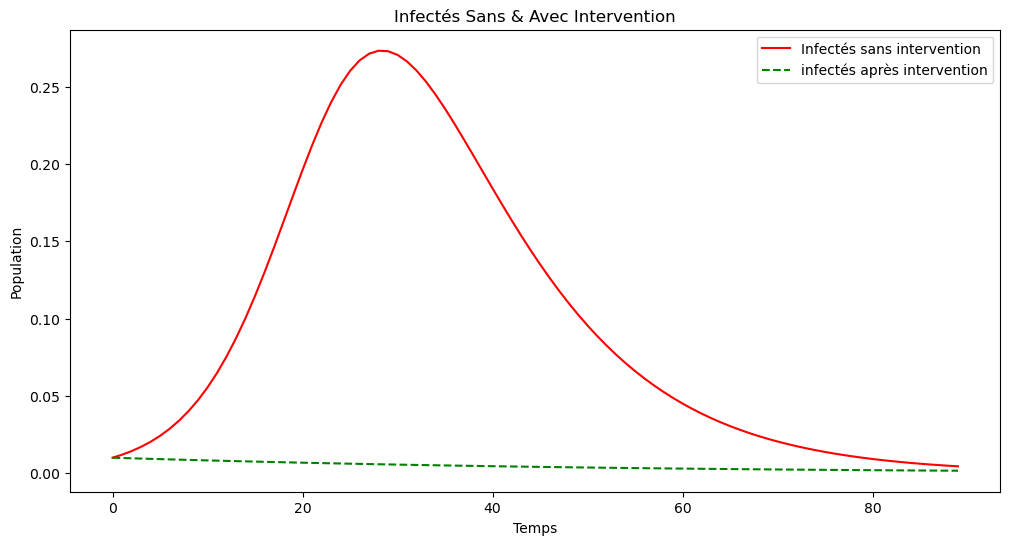

In [100]:
#3. Comparaison des scénarios avec et sans intervention

# Simulation sans intervention 
times, susceptibles_predict, infectes_predict, retablis_predict, deces_predict = sird_euler(super_beta, super_gama, super_mu, S0, I0, R0, D0, step, duree)     

# Après intervention
times_interv, susceptibles_interv, infectes_interv, retablis_interv, deces_interv = sird_euler(beta_intervention, super_gama, super_mu, S0, I0, R0, D0, step, duree)     

# Sur les infectés
plt.figure(figsize=(12, 6))

plt.plot(times, infectes_predict, 'red', label = 'Infectés sans intervention')
plt.plot(times_interv, infectes_interv, 'green',linestyle='--' ,label = 'infectés après intervention')    

plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Infectés Sans & Avec Intervention')
plt.show()

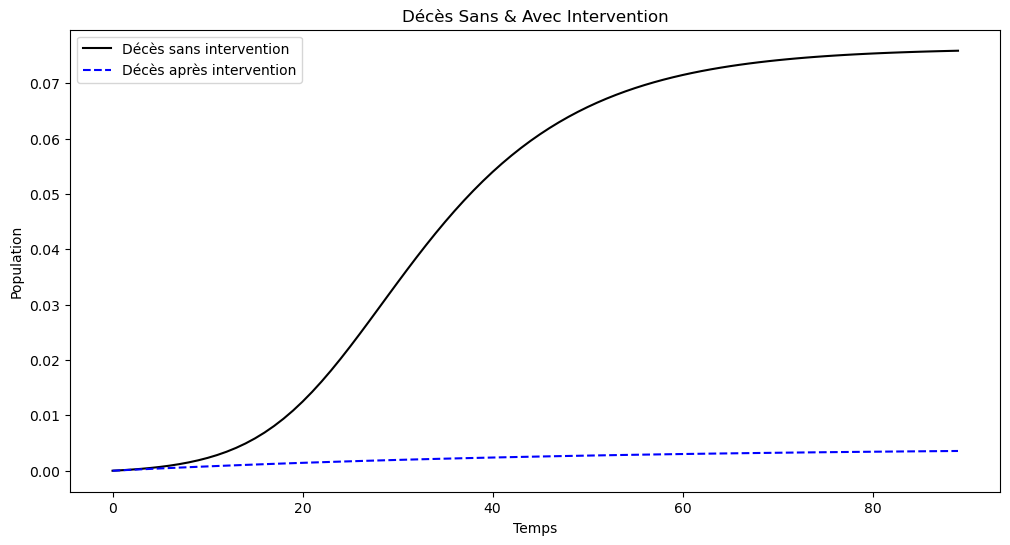

In [104]:
# Sur les décès
plt.figure(figsize=(12, 6))

plt.plot(times, deces_predict, 'black', label = 'Décès sans intervention')
plt.plot(times_interv, deces_interv, 'b',linestyle = '--', label = 'Décès après intervention')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Décès Sans & Avec Intervention')
plt.show()

3.

# Interprétation des résultats de scénarios

- Dand le premier cas, R0 > 0 (R0 initial), on voit bien que la courbe des infectés à un pic considérable et pire pour les cas des décès qui va croissante également.
- Après intervention (R0 < 0), l'épidémie est maitrisée plus rapidement, et les courbes finissent par chutter.

# En conclusion, les résultats de notre modèle sont bien probants.